# **1. Limpeza dos dados**

Importa as bibliotecas

In [1]:
import os
import pandas as pd
from branch_1 import limpar, estacoes, min_max
import matplotlib.pyplot as plt
import math

Cria uma cópia limpa (ANO_limpo.csv) do conjunto de dados em uma nova pasta (dados_limpos)

In [ ]:
pasta = "C:/Users/nicho/Taverna/projeto-temperaturas/INMET/dados"
pasta_limpa = "C:/Users/nicho/Taverna/projeto-temperaturas/INMET/dados_limpos"
os.makedirs(pasta_limpa, exist_ok=True)
for ano in os.listdir(pasta):
    caminho = os.path.join(pasta, ano)
    df_limpo = limpar(caminho)
    df_limpo.to_csv(os.path.join(pasta_limpa, ano.replace(".CSV", "_limpo.csv")), index=False)

# **2. Separação por estação do ano**

Quadriplica o número de data frames, dividindo por estação do ano. Isso é organizado em uma pasta de estações com arquivos do tipo ANO_ESTACAO.csv

In [11]:
pasta = "C:/Users/nicho/Taverna/projeto-temperaturas/INMET/dados_limpos"
for ano in os.listdir(pasta):
    caminho = os.path.join(pasta, ano)
    lista = estacoes(caminho)
    ano = ano.replace("_limpo.csv", "")
    for i in range(4):
        if i == 0:
            lista[i].to_csv(f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/estacoes/outono/{ano}_outono.csv", index=False)
        elif i == 1:
            lista[i].to_csv(f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/estacoes/inverno/{ano}_inverno.csv", index=False)
        elif i == 2:
            lista[i].to_csv(f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/estacoes/primavera/{ano}_primavera.csv", index=False)
        else:
            lista[i].to_csv(f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/estacoes/verao/{ano}_verao.csv", index=False)

## **2.1 Variação das estações**

Faz data frames com apenas o mínimo e máximo das temperaturas de cada estação, na forma ANO_ESTACAO_min_max.csv

In [ ]:
lista = ["outono", "inverno", "primavera", "verao"]
for i in range(4):
    pasta = f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/estacoes/{lista[i]}"
    for item in os.listdir(pasta):
        ano = item[:4]
        caminho = os.path.join(pasta, item)
        df = min_max(caminho, "Data", "Temperatura")
        df.to_csv(f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/estacoes_min_max/{lista[i]}/{ano}_{lista[i]}_min_max.csv", index=False)

## **2.2 Organização em um único dataframe**

Faz um único data frame resumindo todas informações até agora. Ele contém todos os anos e os min/max de cada estação. Esse arquivo é salvo na pasta "resultados", no qual irá guardar os principais arquivos dessa parte do projeto

In [11]:
lista = ["outono", "inverno", "primavera", "verao"]
outono_min = []
inverno_min = []
primavera_min = []
verao_min = []
outono_max = []
inverno_max = []
primavera_max = []
verao_max = []
for i in range(4):
    pasta = f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/estacoes_min_max/{lista[i]}"
    for item in os.listdir(pasta):
        df = pd.read_csv(os.path.join(pasta, item))
        temp_min = df["min"].mean()
        temp_max = df["max"].mean()
        min = round(temp_min, 2)
        max = round(temp_max, 2)
        if min:
            if lista[i] == "outono":
                outono_min.append(min)
            elif lista[i] == "inverno":
                inverno_min.append(min)
            elif lista[i] == "primavera":
                primavera_min.append(min)
            else:
                verao_min.append(min)
        else:
            if lista[i] == "outono":
                outono_min.append(None)
            elif lista[i] == "inverno":
                inverno_min.append(None)
            elif lista[i] == "primavera":
                primavera_min.append(None)
            else:
                verao_min.append(None)
        if max:
            if lista[i] == "outono":
                outono_max.append(max)
            elif lista[i] == "inverno":
                inverno_max.append(max)
            elif lista[i] == "primavera":
                primavera_max.append(max)
            else:
                verao_max.append(max)
        else:
            if lista[i] == "outono":
                outono_max.append(None)
            elif lista[i] == "inverno":
                inverno_max.append(None)
            elif lista[i] == "primavera":
                primavera_max.append(None)
            else:
                verao_max.append(None)

In [12]:
anos = []
for i in range(2006, 2026):
    anos.append(i)
dict = {
    "Anos": anos,
    "Outono_min": outono_min,
    "Outono_max": outono_max,
    "Inverno_min": inverno_min,
    "Inverno_max": inverno_max,
    "Primavera_min": primavera_min,
    "Primavera_max": primavera_max,
    "Verao_min": verao_min,
    "Verao_max": verao_max
    }
df = pd.DataFrame(dict)

In [13]:
caminho = "C:/Users/nicho/Taverna/projeto-temperaturas/INMET/resultados/resultado_1.csv"
df.to_csv(caminho, index=False)

# **3. Plotagens**

Aqui será plotado as máximas médias (em vermelho), mínimas médias (em azul) e amplitude entre elas (em roxo). Isso será salvo na pasta resultados/imagens

## **3.1 Máximas**

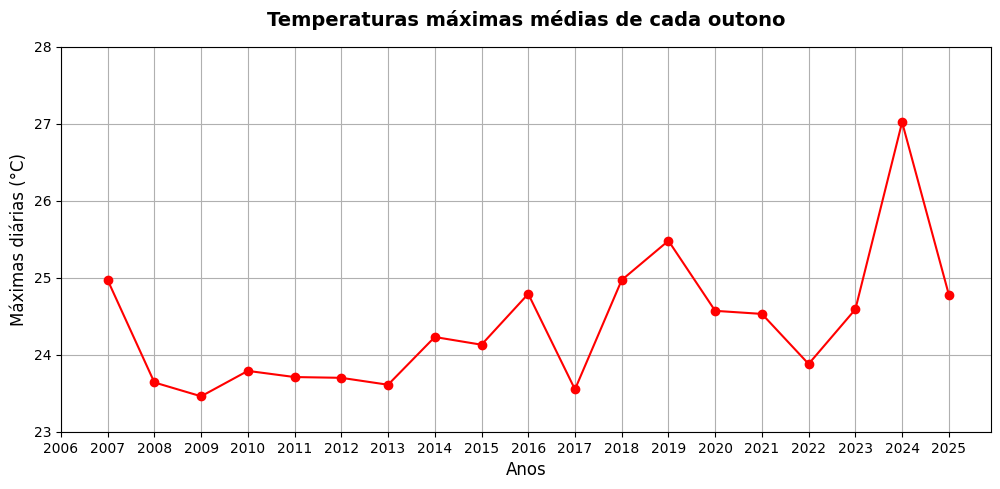

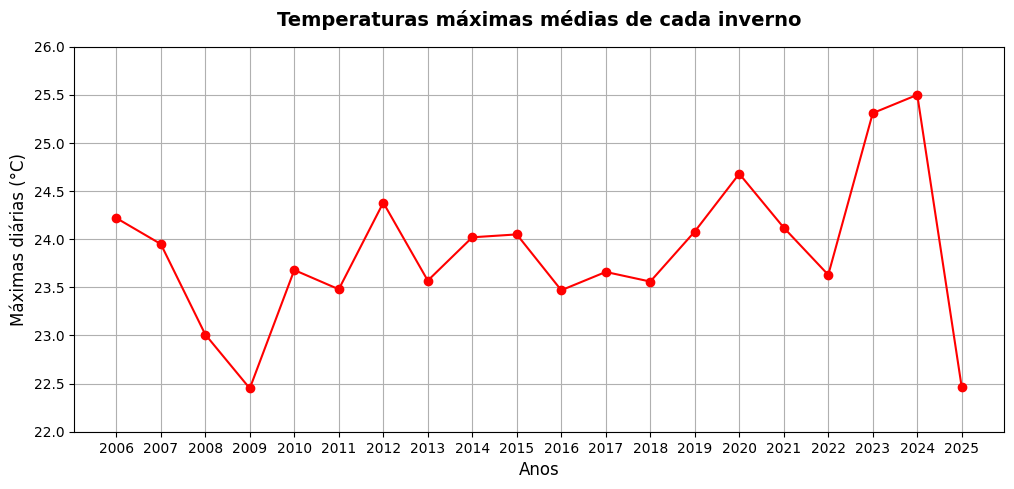

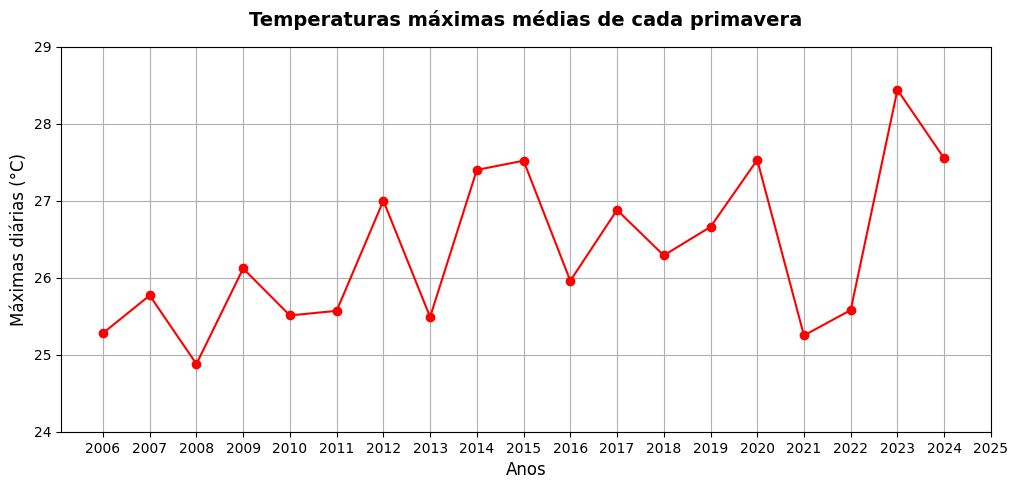

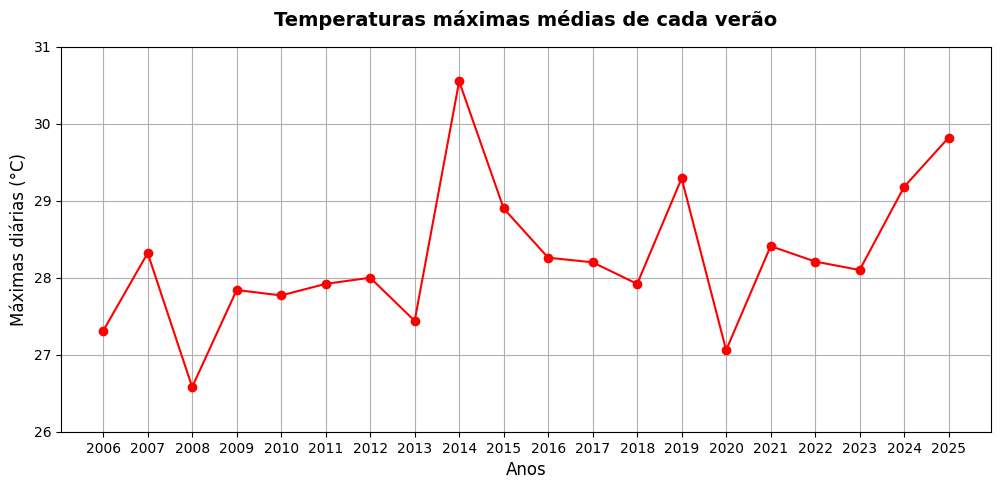

In [24]:
df = pd.read_csv("C:/Users/nicho/Taverna/projeto-temperaturas/INMET/resultados/resultado_1.csv")
dict = {"Outono": "outono", "Inverno": "inverno", "Primavera": "primavera", "Verao": "verão"}
for chave, valor in dict.items():
    max = math.ceil(df[f"{chave}_max"].max())
    min = math.floor(df[f"{chave}_max"].min())
    plt.figure(figsize=(12, 5))
    plt.plot(df["Anos"], df[f"{chave}_max"], marker="o", linestyle="-", color="red") 
    plt.xlabel("Anos", fontsize=12)  
    plt.ylabel("Máximas diárias (°C)", fontsize=12)
    plt.title(f"Temperaturas máximas médias de cada {valor}", fontweight="bold", fontsize=14, pad="15")  
    plt.grid(True)  
    plt.xticks(df["Anos"])
    plt.ylim(min, max)
    plt.savefig(f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/resultados/imagens/{chave.lower()}_max.png")

## **3.2 Mínimas**

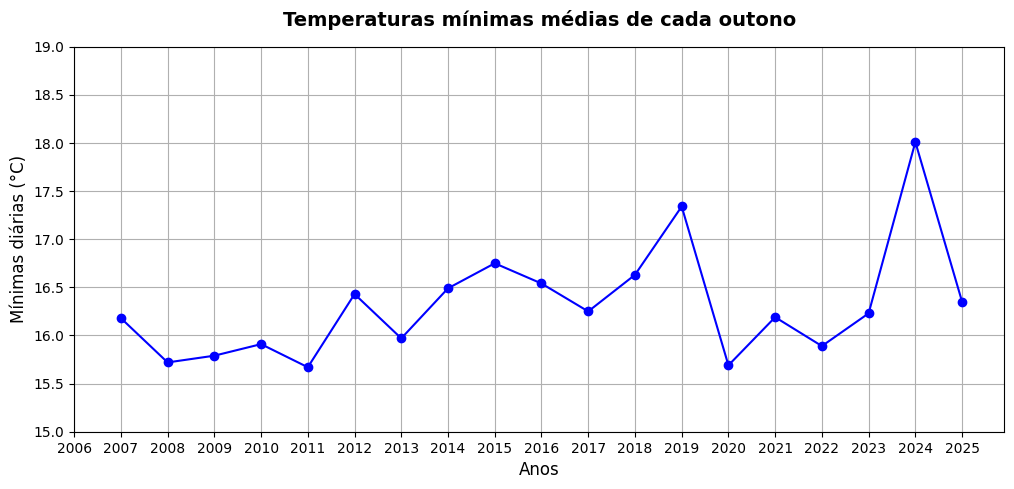

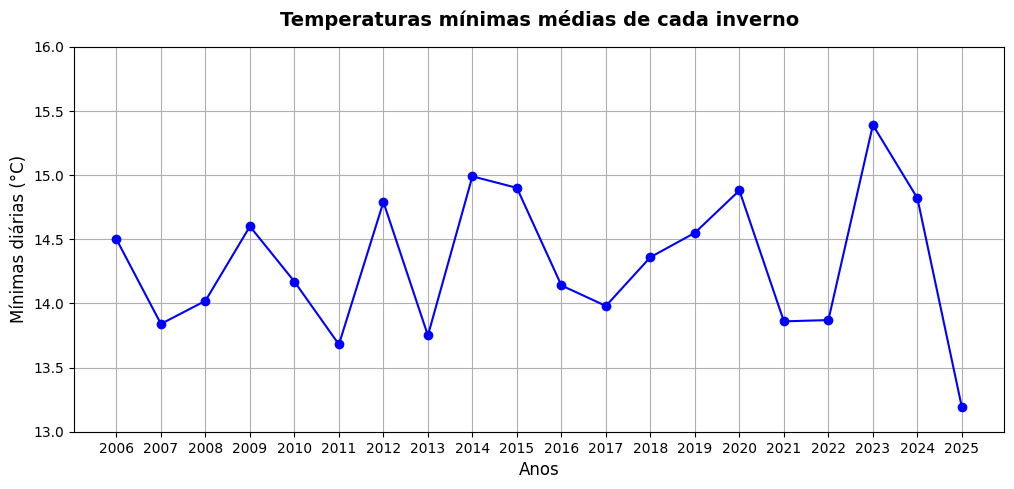

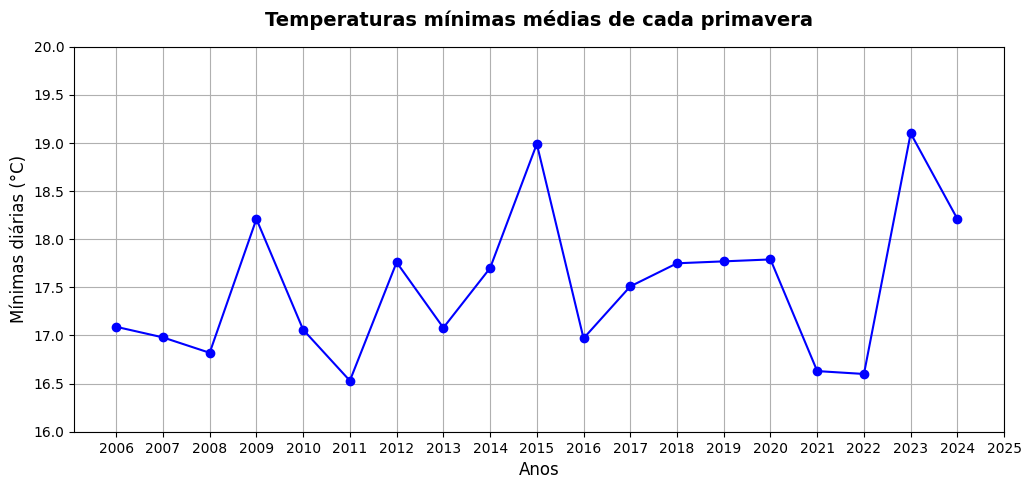

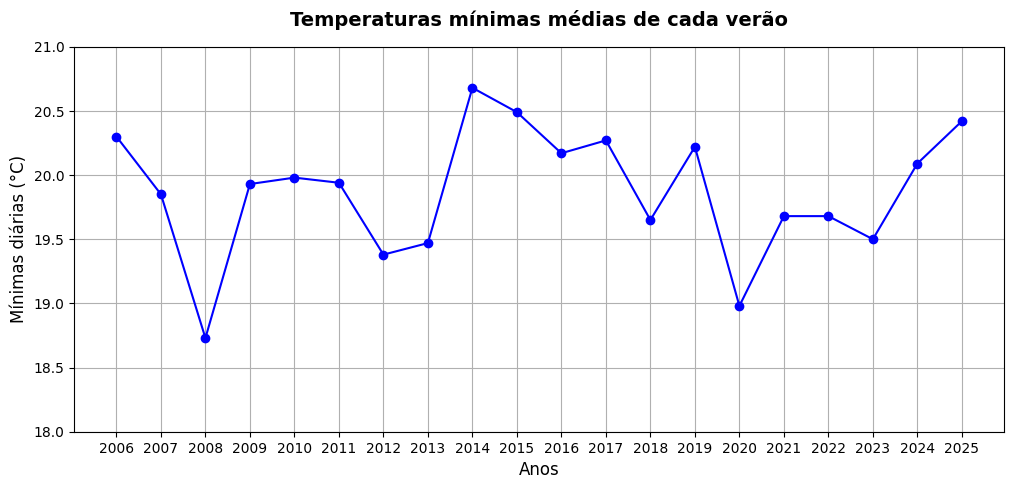

In [25]:
df = pd.read_csv("C:/Users/nicho/Taverna/projeto-temperaturas/INMET/resultados/resultado_1.csv")
dict = {"Outono": "outono", "Inverno": "inverno", "Primavera": "primavera", "Verao": "verão"}
for chave, valor in dict.items():
    max = math.ceil(df[f"{chave}_min"].max())
    min = math.floor(df[f"{chave}_min"].min())
    plt.figure(figsize=(12, 5))
    plt.plot(df["Anos"], df[f"{chave}_min"], marker="o", linestyle="-", color="blue") 
    plt.xlabel("Anos", fontsize=12)  
    plt.ylabel("Mínimas diárias (°C)", fontsize=12)
    plt.title(f"Temperaturas mínimas médias de cada {valor}", fontweight="bold", fontsize=14, pad="15")  
    plt.grid(True)  
    plt.xticks(df["Anos"])
    plt.ylim(min, max)
    plt.savefig(f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/resultados/imagens/{chave.lower()}_min.png")

## **3.3 Amplitude**

In [9]:
df_0 = pd.read_csv("C:/Users/nicho/Taverna/projeto-temperaturas/INMET/resultados/resultado_1.csv")
anos = []
for i in range(2006, 2026):
    anos.append(i)
df = pd.DataFrame(anos)
df.columns = ["Anos"]
lista = ["Outono", "Inverno", "Primavera", "Verao"]
for i in range(4):
    df[f"Amplitude_{lista[i].lower()}"] = df_0[f"{lista[i]}_max"] - df_0[f"{lista[i]}_min"]

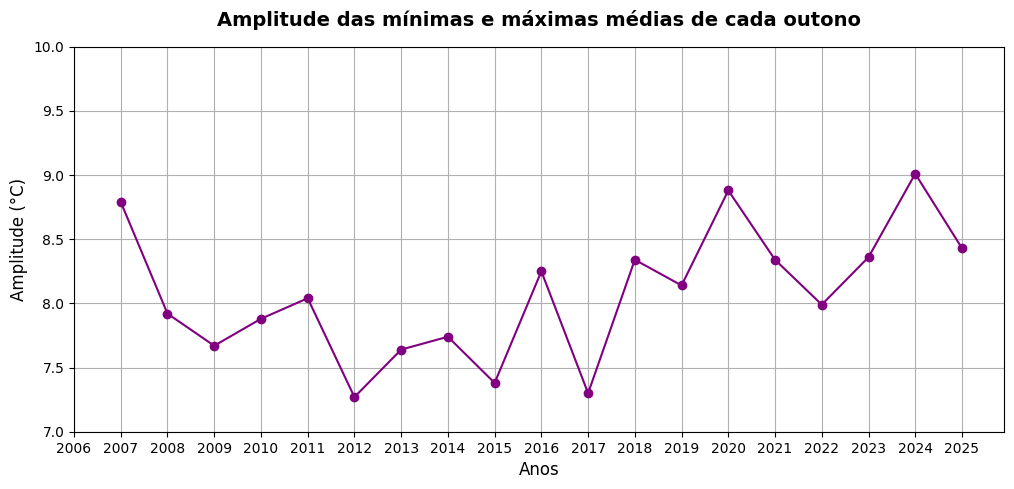

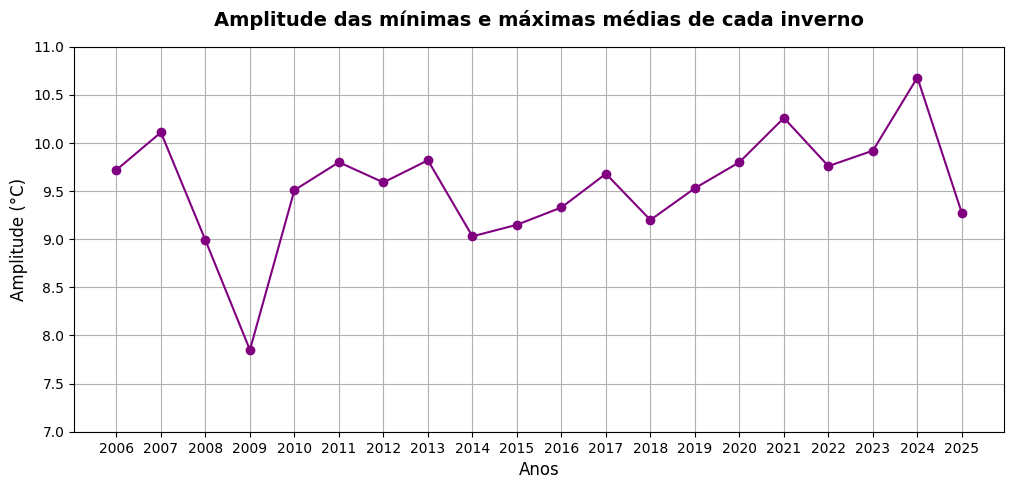

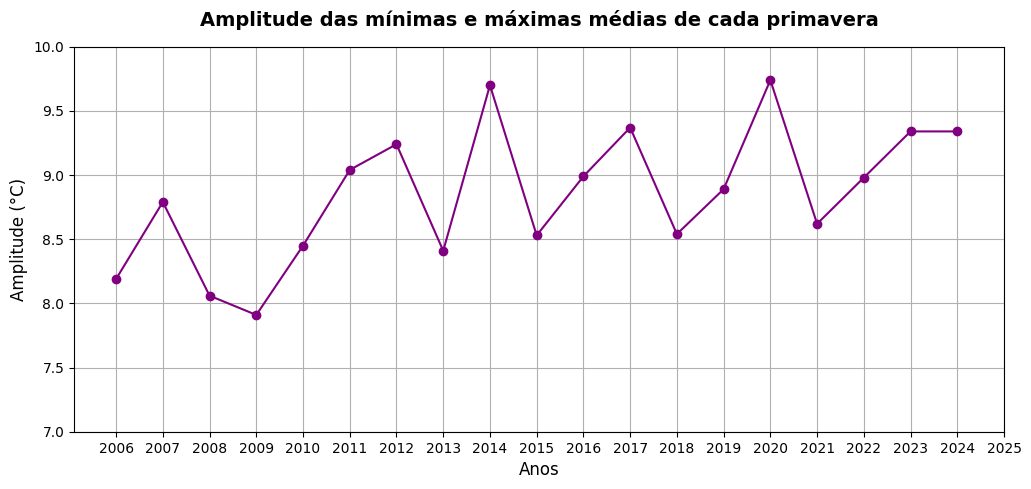

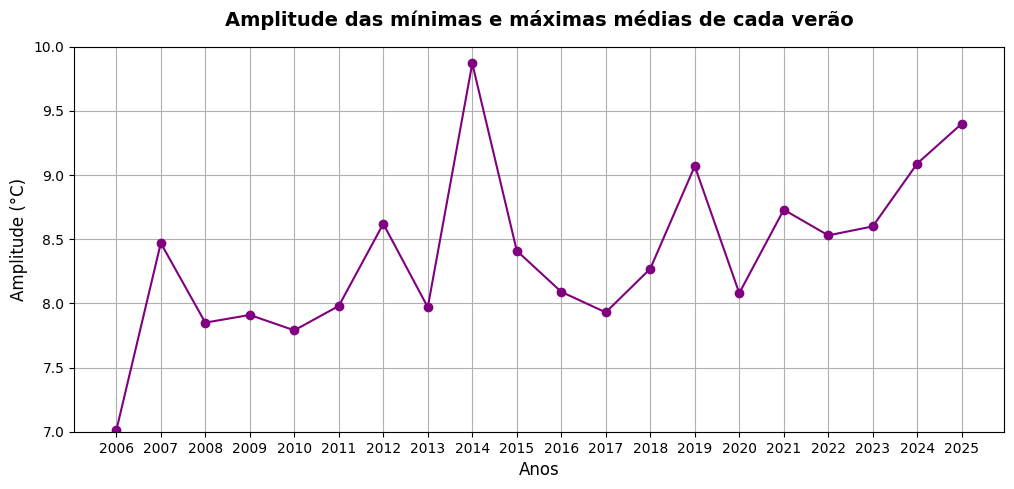

In [11]:
dict = {"outono": "outono", "inverno": "inverno", "primavera": "primavera", "verao": "verão"}
for chave, valor in dict.items():
    max = math.ceil(df[f"Amplitude_{chave}"].max())
    min = math.floor(df[f"Amplitude_{chave}"].min())
    plt.figure(figsize=(12, 5))
    plt.plot(df["Anos"], df[f"Amplitude_{chave}"], marker="o", linestyle="-", color="purple") 
    plt.xlabel("Anos", fontsize=12)  
    plt.ylabel("Amplitude (°C)", fontsize=12)
    plt.title(f"Amplitude das mínimas e máximas médias de cada {valor}", fontweight="bold", fontsize=14, pad="15")  
    plt.grid(True)  
    plt.xticks(df["Anos"])
    plt.ylim(min, max)
    plt.savefig(f"C:/Users/nicho/Taverna/projeto-temperaturas/INMET/resultados/imagens/{valor}_amplitude.png")